# LENDING CLUB CASE STUDY

#### What is Lending Club?

* Lending Club is the Peer to Peer Lending platform. Through Lending Club, Investors will join to invest on loans applied by borrower.

* Borrower applies for the loan(loan_amnt) by providing their income(annual_inc), credit quality score, professional experience(emp_length), and for what purpose they are applying the loan(purpose and title) and which place they are staying(addr_state) and are they staying in their own house / rent / mortgage (home_ownership)

* Lending club shares the request with the investors.

* If once they validated the details, they will share how much amount got approved by investors(funded_amnt_inv) and their rate of interest(int_rate) and (grade) and (sub_grade) will get decided

* Borrower will choose the term period (term - 36 months / 60 months) to repay the amount along with the interest

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set the display.max_rows to None to get all the values
pd.options.display.max_rows = None

In [3]:
# Loading the dataset
loan_data = pd.read_csv('loan.csv')

C:\Users\ashut\AppData\Local\Temp\ipykernel_4668\2616565975.py:2: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv('loan.csv')


In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Let's understand data

In [5]:
loan_data.shape

(39717, 111)

* It can be seen that there are **39717 rows and 111 columns**

In [6]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
## Check how many rows have null values(no values)
loan_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

C:\Users\ashut\AppData\Local\Temp\ipykernel_4668\3375057882.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  loan_data.info(verbose=True, null_counts=True)


In [8]:
# We can see there are columns with no values at all
# Let's check them

null_columns = loan_data.columns[loan_data.isnull().all()].tolist()
len(null_columns)

54

!!!!! As seen there are 54 columns with no values

In [9]:
# Checking if columns have only one unique value or mutliple unique values
loan_data.describe(include='all').loc['unique', :]

id                                  NaN
member_id                           NaN
loan_amnt                           NaN
funded_amnt                         NaN
funded_amnt_inv                     NaN
term                                  2
int_rate                            371
installment                         NaN
grade                                 7
sub_grade                            35
emp_title                         28820
emp_length                           11
home_ownership                        5
annual_inc                          NaN
verification_status                   3
issue_d                              55
loan_status                           3
pymnt_plan                            1
url                               39717
desc                              26527
purpose                              14
title                             19615
zip_code                            823
addr_state                           50
dti                                 NaN


In [10]:
# Let's see what unique values are stored in few of the columns

#loan_status has 3 unique values
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [11]:
#purpose has 14 unique values
loan_data['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [12]:
#next_pymnt_d has two values
loan_data['next_pymnt_d'].unique()

array([nan, 'Jun-16', 'Jul-16'], dtype=object)

## DATA CLEANING:

* As seen above there are missing values and null values column which will not helps us in proper analysis of the dataset.
* So let's proceed with data cleaning.

AS SEEN ABOVE THERE ARE 54 NULL VALUES COLUMN WHICH ARE NO USE TO US. SO LET'S DROP THEM FIRST.

In [13]:
loan_data = loan_data.dropna(axis=1, how='all')

**We are using the dropna method with the axis argument set to 1 indicating that we're dropping columns and the how argument set to all indicating that we're dropping columns where all values are missing.**

In [14]:
## Let's see if the null value columns are dropped
loan_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

C:\Users\ashut\AppData\Local\Temp\ipykernel_4668\2544070973.py:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  loan_data.info(verbose=True, null_counts=True)


In [15]:
loan_data.shape

(39717, 57)

In [16]:
# Correlation between data

loan_data.corr()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
id,1.000000,0.993650,0.141919,0.152286,0.249547,0.086587,0.008731,0.095983,-0.008644,-0.042378,...,0.033426,-0.013359,0.122365,NaN,NaN,NaN,NaN,NaN,-0.009505,NaN
member_id,0.993650,1.000000,0.140710,0.150322,0.257887,0.081025,0.009380,0.096963,-0.008119,-0.047086,...,0.031565,-0.015155,0.123627,NaN,NaN,NaN,NaN,NaN,-0.008769,NaN
loan_amnt,0.141919,0.140710,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,-0.031864,0.009229,...,0.135446,0.072853,0.448742,NaN,NaN,NaN,NaN,NaN,-0.037180,NaN
funded_amnt,0.152286,0.150322,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,-0.032355,0.009259,...,0.136284,0.074676,0.453133,NaN,NaN,NaN,NaN,NaN,-0.038502,NaN
funded_amnt_inv,0.249547,0.257887,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.038501,-0.005712,...,0.123759,0.060358,0.442604,NaN,NaN,NaN,NaN,NaN,-0.042746,NaN
installment,0.086587,0.081025,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,-0.019657,0.009722,...,0.118152,0.075467,0.401688,NaN,NaN,NaN,NaN,NaN,-0.034103,NaN
annual_inc,0.008731,0.009380,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.023083,0.033908,...,0.021589,0.015604,0.140401,NaN,NaN,NaN,NaN,NaN,-0.016801,NaN
dti,0.095983,0.096963,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,-0.034452,0.001405,...,0.024878,0.011033,0.005212,NaN,NaN,NaN,NaN,NaN,0.005691,NaN
delinq_2yrs,-0.008644,-0.008119,-0.031864,-0.032355,-0.038501,-0.019657,0.023083,-0.034452,1.000000,0.008091,...,0.012315,0.013912,-0.012149,NaN,NaN,NaN,NaN,NaN,0.003375,NaN
inq_last_6mths,-0.042378,-0.047086,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,0.008091,1.000000,...,0.018972,0.012420,0.028514,NaN,NaN,NaN,NaN,NaN,0.016346,NaN


#### Drop single value columns. It's correlation is always going to be 1

In [17]:
nunique = loan_data.nunique()
cols_to_drop = nunique[nunique == 1].index
loan_data = loan_data.drop(cols_to_drop, axis=1)

In [18]:
loan_data.shape

(39717, 48)

#### Dropping of the columns which have only 0 or Nan

In [19]:
null_sum = loan_data.isnull().sum()
zero_sum = (loan_data == 0).astype(int).sum()
cols_to_drop = (null_sum + zero_sum) == loan_data.shape[0]
loan_data = loan_data.drop(cols_to_drop[cols_to_drop == True].index, axis=1)

In [20]:
loan_data.shape

(39717, 48)

#### As we need to know which customers will default let's create a separate column where 0 represents not defaulted and 1 represents default

In [21]:
loan_data['Defaulted'] = loan_data['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,Defaulted
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,0


* Let's check if the dataset has any outliers so we can remove them.

In [22]:
print(loan_data.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies',
       'Defaulted'],
      dtype='object')


#### Columns contributing to customer behaviour as understood from data dictionary

* delinq_2yrs
* earliest_cr_line
* inq_last_6mths
* open_acc
* pub_rec
* revol_bal
* revol_util
* total_acc
* out_prncp
* total_pymnt
* total_pymnt_inv
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d
* last_pymnt_amnt
* last_credit_pull_d
* application_type
* mths_since_last_delinq is based on customer behavior
* 'mths_since_last_record no. of months since last record
* **As these columns are related to customer behavior they won't contribute towards analysis so dropping them off** 

In [23]:
loan_data = loan_data.drop(columns=['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 
                                   'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
                                   'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee',
                                   'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
                                   'last_credit_pull_d'])

In [24]:
loan_data.shape

(39717, 30)

In [25]:
for i in loan_data:
    print('------------')
    print(i)
    print('------------')
    print(loan_data[i].describe())

------------
id
------------
count    3.971700e+04
mean     6.831319e+05
std      2.106941e+05
min      5.473400e+04
25%      5.162210e+05
50%      6.656650e+05
75%      8.377550e+05
max      1.077501e+06
Name: id, dtype: float64
------------
member_id
------------
count    3.971700e+04
mean     8.504636e+05
std      2.656783e+05
min      7.069900e+04
25%      6.667800e+05
50%      8.508120e+05
75%      1.047339e+06
max      1.314167e+06
Name: member_id, dtype: float64
------------
loan_amnt
------------
count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64
------------
funded_amnt
------------
count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64
------------
funded_amnt_inv
-----

* As seen above there are few columns with 0 values which will not contribute to the analysis so we can drop them.

#### id column is not required


In [26]:
loan_data = loan_data.drop(columns=['id'])

In [27]:
loan_data.shape

(39717, 29)

#### url column gives the url to details so it's not needed

In [28]:
loan_data = loan_data.drop(columns=['url'])

In [29]:
loan_data.shape

(39717, 28)

In [30]:
loan_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'mths_since_last_delinq', 'mths_since_last_record',
       'total_rec_prncp', 'next_pymnt_d', 'pub_rec_bankruptcies', 'Defaulted'],
      dtype='object')

### FURTHER COLUMNS WHICH CAN BE DROPPED.

#### emp_title corresponds to employer professional title. 
#### zip_code corresponds to the first 3 zip code we don't need
#### addr_state corresponds to the state the customer lives in not needed
#### issue_d the date which loan was funded(as here we don't need as we need to find if the customer can be approved of the loan)
#### desc -> a description of the loan he is requesting for
#### total_rec_prncp -> principal amount received till date
#### next_pymnt_d is after approval
#### pub_rec_bankruptcies number of public record bankruptcies 

In [31]:
loan_data = loan_data.drop(columns=['emp_title', 'zip_code', 'addr_state', 'issue_d', 'desc', 'total_rec_prncp', 'next_pymnt_d', 
                                   'pub_rec_bankruptcies'])

In [32]:
loan_data.shape

(39717, 20)

In [33]:
loan_data.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'dti', 'mths_since_last_delinq',
       'mths_since_last_record', 'Defaulted'],
      dtype='object')

* Missed to drop the two of the customer behaviours ['mths_since_last_delinq', ''mths_since_last_record]'

* member_id is not going to contribute

In [34]:
loan_data = loan_data.drop(columns=['mths_since_last_delinq', 'mths_since_last_record', 'member_id'])

In [35]:
loan_data.shape

(39717, 17)

In [36]:
loan_data.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose', 'title',
       'dti', 'Defaulted'],
      dtype='object')

## UNIVARIATE ANALYSIS

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

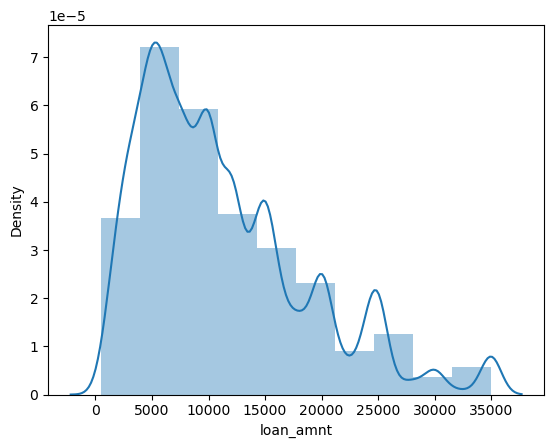

In [37]:
# Loan Amount Applied
sns.distplot(loan_data.loan_amnt, bins=10)

#### OBSERVATION
* From the above plot we can see that most of the loan amount requested is between 0-15k

grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64


<AxesSubplot:xlabel='grade'>

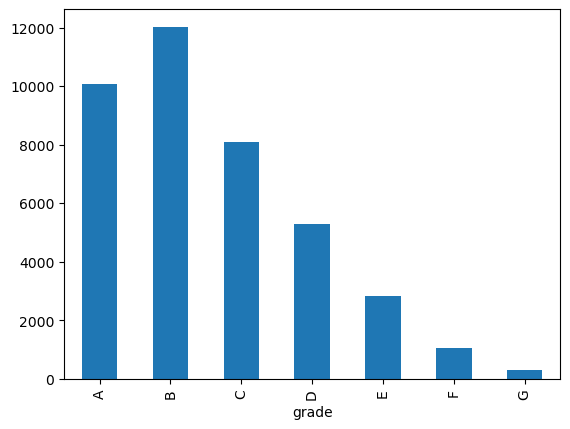

In [38]:
### TOTAL LOANS IN EACH GRADE

print(loan_data.groupby('grade').grade.count())
loan_data.groupby('grade').grade.count().plot.bar()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

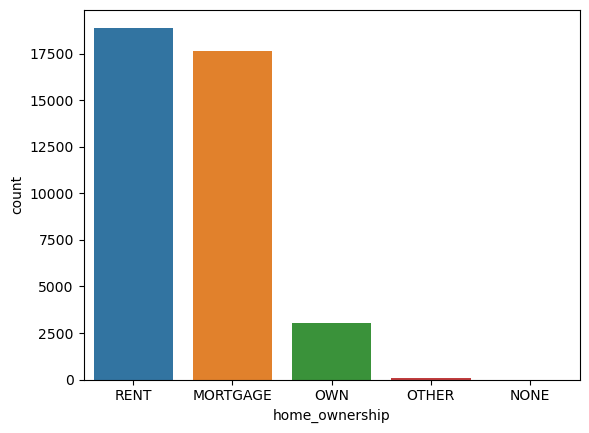

In [39]:

## Loan applied by Home Ownership

loan_data.groupby('home_ownership').home_ownership.count()
sns.countplot(loan_data.home_ownership, order=loan_data.home_ownership.value_counts().index)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_status', ylabel='count'>

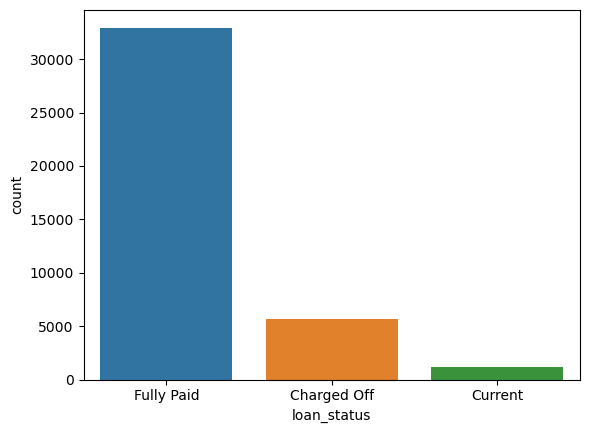

In [40]:
# Count of People who paid the loan, who charged off and those who are in current
# Loan Payment
sns.countplot(loan_data.loan_status, order=loan_data.loan_status.value_counts().index)


## BIVARIATE ANALYSIS

#### Loan amount by average in each grade

<AxesSubplot:xlabel='grade', ylabel='loan_amnt'>

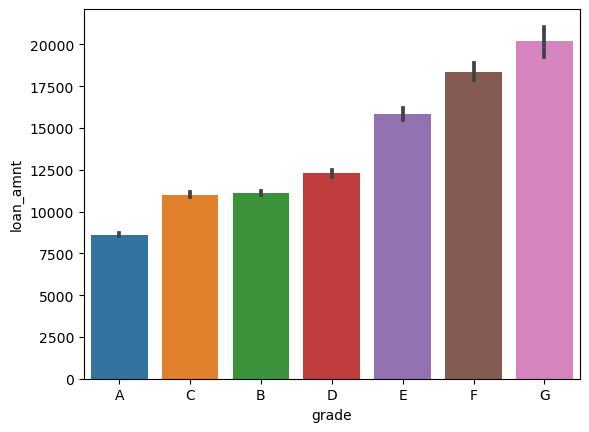

In [41]:
# funded loan amount in each grade

order_loan_amnt = loan_data.groupby(['grade'])['loan_amnt'].aggregate(np.mean).reset_index().sort_values('loan_amnt')
sns.barplot(data=loan_data, y='loan_amnt', x='grade', order=order_loan_amnt['grade'])

##### OBSERVATION
* From the above graph it can be seen that **THE GRADE INCREASES AS THE LOAN AMOUNT INCREASES** where **grade A being the lowest and grade G being the highest.**

### DEFAULTERS BY EACH GRADE

<AxesSubplot:xlabel='grade', ylabel='Defaulted'>

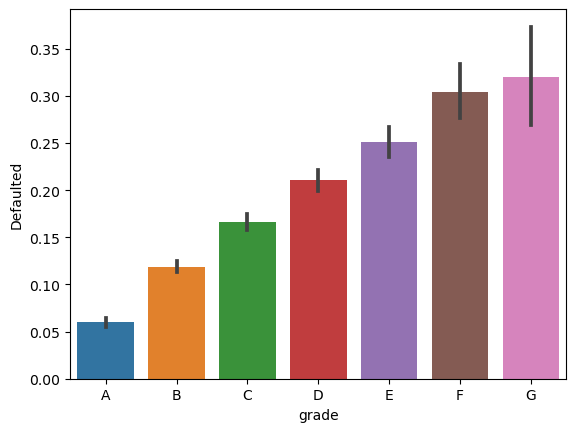

In [42]:
# Let's see how many defaulters in each grade
order_grades = loan_data.groupby(["grade"])['Defaulted'].aggregate(np.mean).reset_index().sort_values('Defaulted')
sns.barplot(data=loan_data, y='Defaulted', x='grade', order=order_grades['grade'])

##### OBSERVATION
* As seen already grade corresponds to the loan amount
* In the above graph it is shown that **DEFAULTERS INCREASE WHEN THE LOAN AMOUNT INCREASES**

### DEFAULTERS BY EACH SUBGRADE

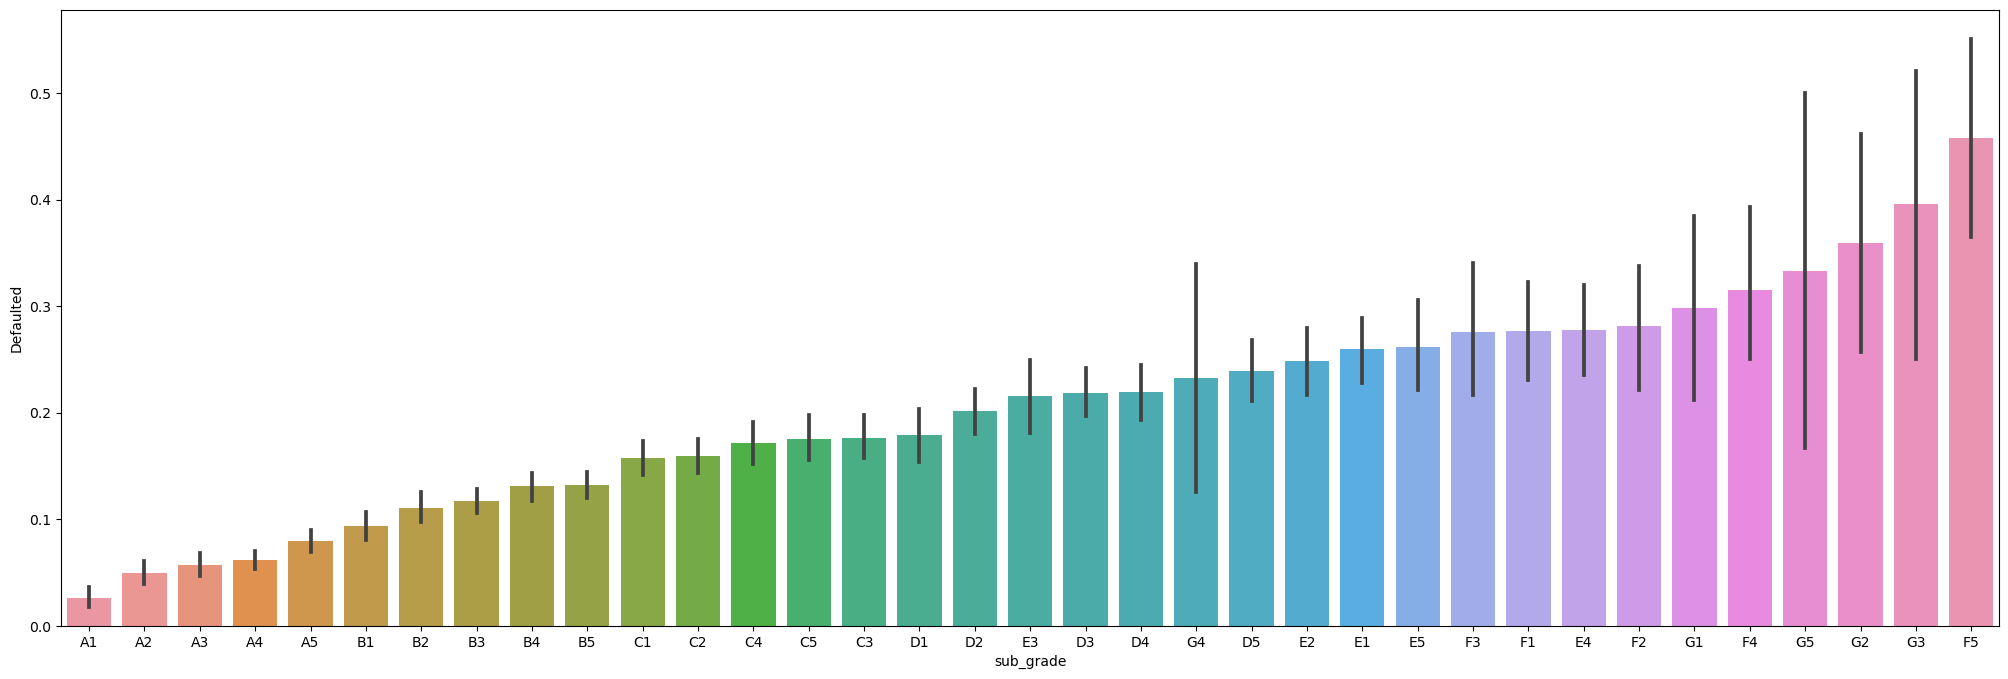

In [43]:
plt.figure(figsize=(25, 8))
order_subgrade = loan_data.groupby(['sub_grade'])['Defaulted'].aggregate(np.mean).reset_index().sort_values('Defaulted')
sns.barplot(data=loan_data, y='Defaulted', x='sub_grade', order=order_subgrade['sub_grade'])
plt.show()

* From the subgrade plot can be seen as the **F5 subgrade holds the more defaulters where A1 holds the less defaulters.**
* The more defaulters are from **GRADES F & G**

### DEFAULTERS W.R.T VERIFICATION STATUS

<AxesSubplot:xlabel='verification_status', ylabel='Defaulted'>

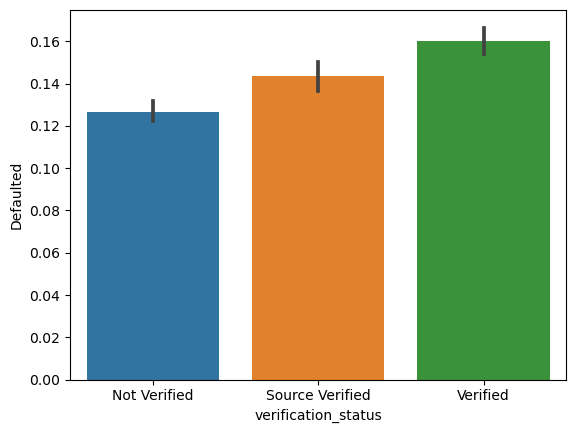

In [44]:
order_verification = loan_data.groupby(['verification_status'])['Defaulted'].aggregate(np.mean).reset_index().sort_values('Defaulted')
sns.barplot(data=loan_data, y='Defaulted', x='verification_status', order=order_verification['verification_status'])

### DEFAULTERS WITH RESPECT TO TERM OF LOAN

In [45]:
print(loan_data['term'].unique())
term_map = {' 36 months': 36, ' 60 months': 60}

loan_data['term'] = loan_data['term'].apply(lambda x: term_map.get(x) if x in term_map else 36)

[' 36 months' ' 60 months']


<AxesSubplot:xlabel='term', ylabel='Defaulted'>

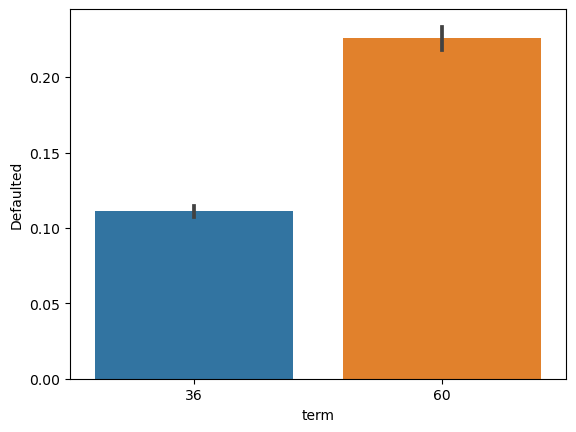

In [46]:
order_term = loan_data.groupby(['term'])['Defaulted'].aggregate(np.mean).reset_index().sort_values('Defaulted')
sns.barplot(data=loan_data, y='Defaulted', x='term', order=order_term['term'])

* It can be seen that defaulters increase when **term of loan is longer**

### DEFAULTERS W.R.T PURPOSE

<AxesSubplot:xlabel='purpose', ylabel='Defaulted'>

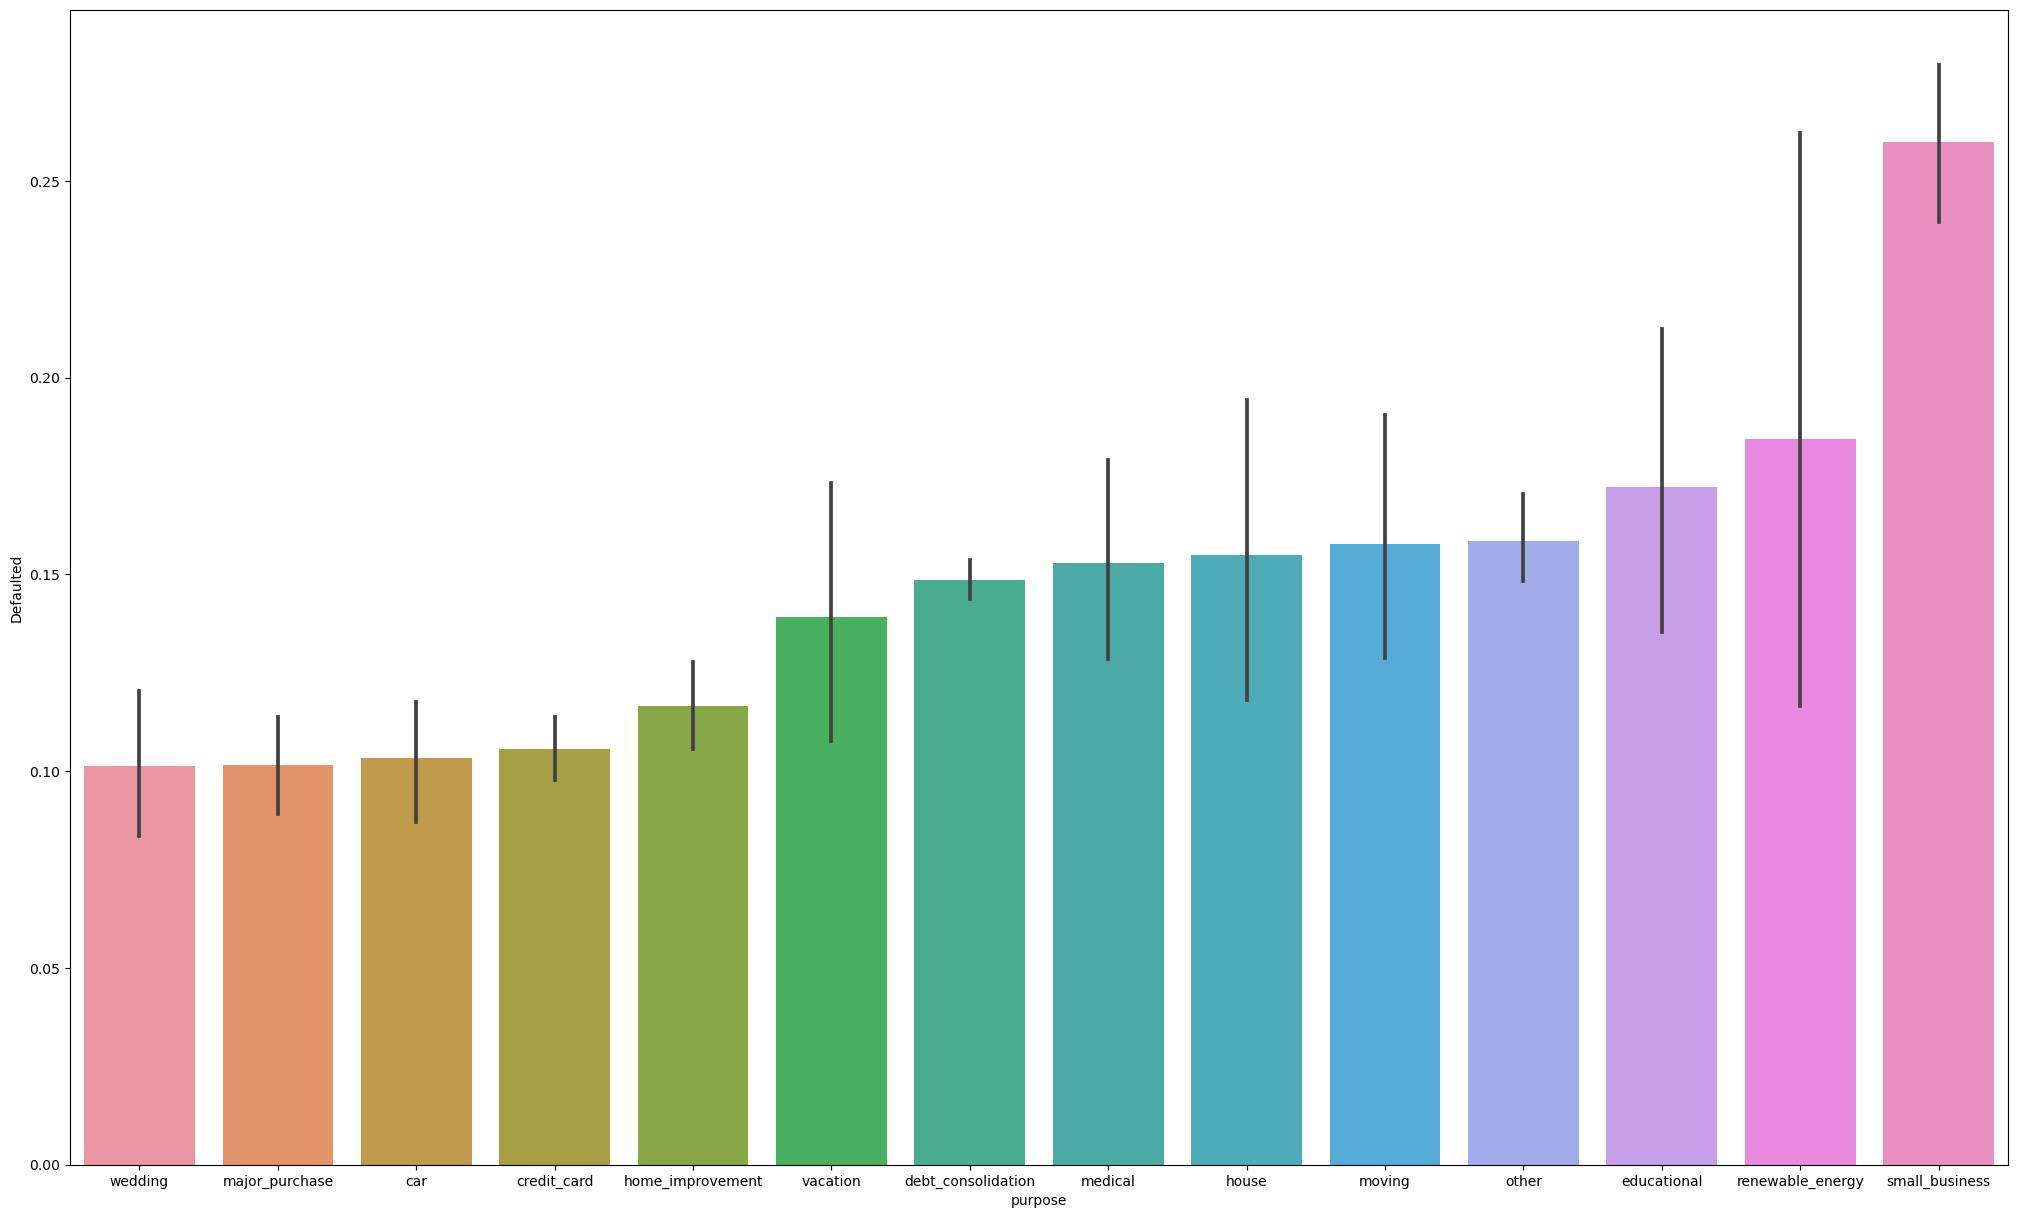

In [47]:
plt.figure(figsize=(25, 15))
order_term = loan_data.groupby(['purpose'])['Defaulted'].aggregate(np.mean).reset_index().sort_values('Defaulted')
sns.barplot(data=loan_data, y='Defaulted', x='purpose', order=order_term['purpose'])

* The most defaulters fall under the category of people who apply loan for **small business**
* People who apply loan for **wedding** and **major purchase** have the least defaulters

### DEFAULTERS W.R.T INTEREST RATE

In [48]:
print(loan_data['int_rate'].unique())

['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.59%' '24.40%' '21.48%' '14.82%'
 '14.17%' '7.29%' '17.88%' '20.11%' '16.02%' '17.51%' '13.43%' '14.91%'
 '13.06%' '15.28%' '15.65%' '17.14%' '11.11%' '10.37%' '16.40%' '7.6

In [49]:
loan_data.int_rate.replace('%', '', inplace=True, regex=True)
print(loan_data.int_rate)
## Changed from float to str for the purpose of cutting them in bins
loan_data.int_rate =loan_data.int_rate.astype('float64')

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
5         7.90
6        15.96
7        18.64
8        21.28
9        12.69
10       14.65
11       12.69
12       13.49
13        9.91
14       10.65
15       16.29
16       15.27
17        6.03
18       11.71
19        6.03
20       15.27
21       12.42
22       11.71
23       11.71
24       11.71
25        9.91
26       14.27
27       16.77
28       11.71
29       11.71
30        7.51
31        7.90
32       15.96
33        8.90
34       15.96
35       10.65
36        9.91
37        7.90
38       12.42
39       12.69
40        7.51
41        7.90
42       18.25
43       16.77
44        6.03
45        9.91
46        8.90
47       10.65
48        6.03
49        6.62
50        9.91
51        9.91
52       10.65
53       15.96
54        9.91
55       19.91
56       19.91
57       12.42
58       10.65
59       16.77
60       12.69
61       17.27
62       14.65
63       16.77
64       10.65
65       10.65
66       1

In [50]:
## Plotting int_rate in bins for better understanding and plotting


def plot_range_with_default(data, xcolumn, bins=10, width=10, height=5, ycolumn='Defaulted'):
    plt.figure(figsize=(width, height))
    ranges = pd.cut(data[xcolumn], bins)
    a = pd.DataFrame({ xcolumn : ranges, ycolumn : data[ycolumn]})
    sns.barplot(y=a[ycolumn], x=a[xcolumn])
    plt.show()

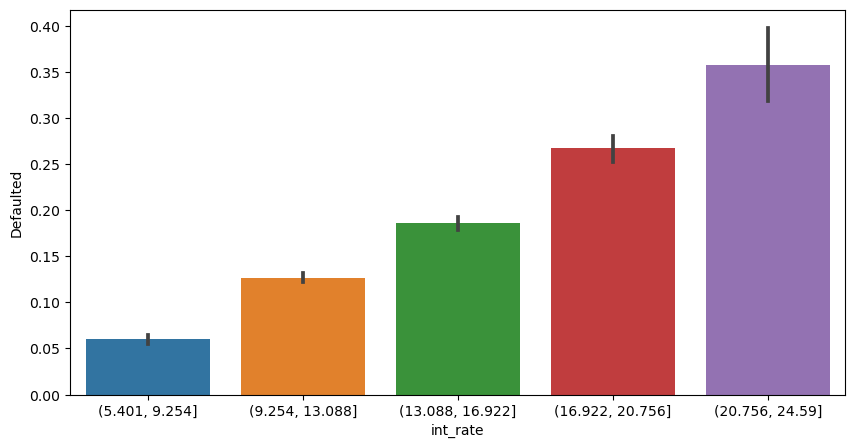

In [51]:
plot_range_with_default(loan_data, 'int_rate', 5)

* It can be seen that as the **interest rate goes high** the **defaulters also increase**.

### DEFAULTERS W.R.T to TERM AND INTEREST RATE

In [52]:
# for short terms 
loan_term = loan_data[loan_data.term == 36]
loan_term.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,Defaulted
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Fully Paid,credit_card,Computer,27.65,0
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Fully Paid,small_business,real estate business,8.72,0
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Fully Paid,other,personel,20.00,0
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Fully Paid,wedding,My wedding loan I promise to pay back,11.20,0
7,3000,3000,3000.0,36,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Fully Paid,car,Car Downpayment,5.35,0


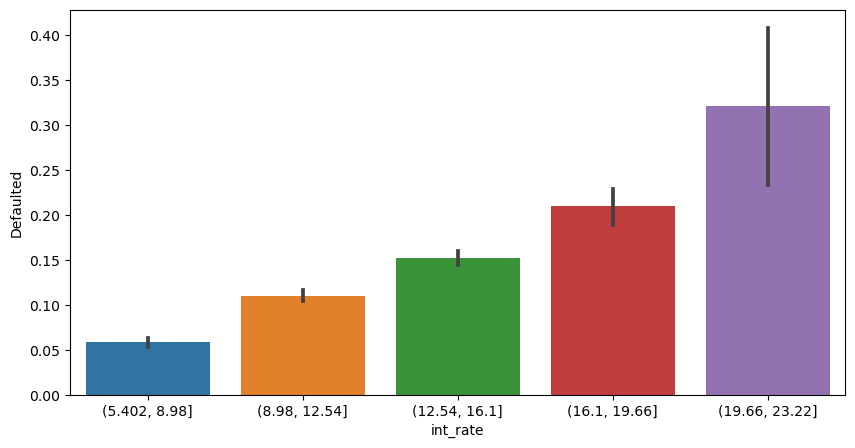

In [53]:
plot_range_with_default(loan_term, 'int_rate', 5)

In [54]:
# for long terms
long_term = loan_data[loan_data.term==60]
long_term.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,Defaulted
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Charged Off,car,bike,1.00,1
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Current,other,Personal,17.94,0
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Fully Paid,debt_consolidation,Loan,23.51,0
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Charged Off,small_business,Expand Business & Buy Debt Portfolio,5.55,1
9,5375,5375,5350.0,60,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Charged Off,other,Building my credit history.,18.08,1


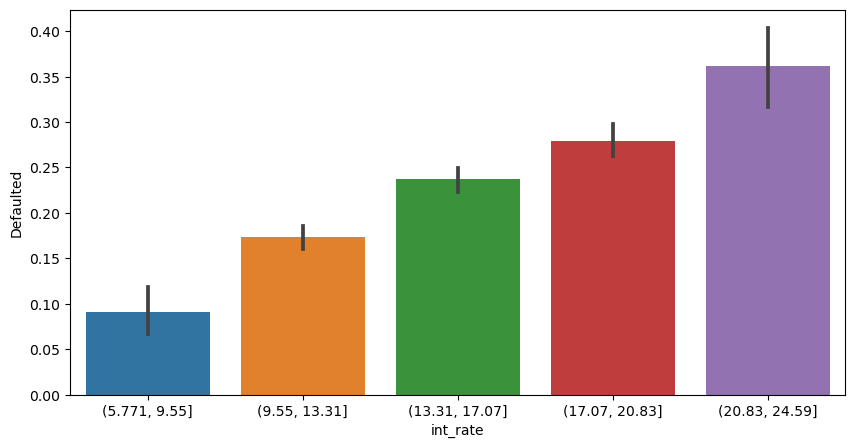

In [55]:
plot_range_with_default(long_term, 'int_rate', 5)

#### OBSERVATION
* There are less defaulters in 36 months compared to 60 months
* From above two plots we can see that for **long term interest rates increase by 1% compared to short term**

### DEFAULTERS W.R.T INCOME

In [56]:
def plot_with_defaults(data, xcolumn, _bins=10, _width=50, _height=10, ycolumn='Defaulted'):
    ranges = pd.qcut(data[xcolumn], _bins)
    a = pd.DataFrame({ xcolumn : ranges, ycolumn : data[ycolumn]})
    sns.barplot(y=a[ycolumn], x=a[xcolumn])
    plt.show()

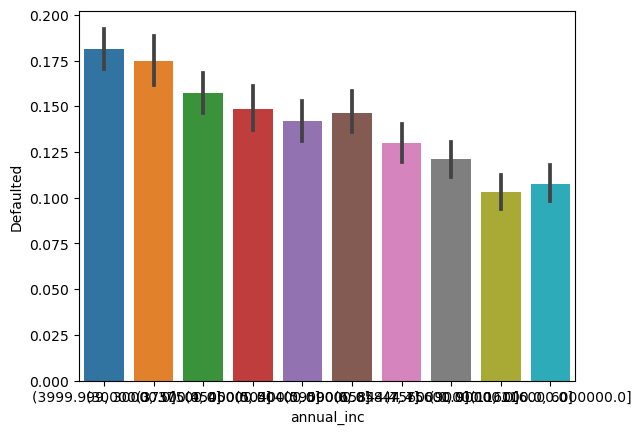

In [57]:
plot_with_defaults(loan_data, 'annual_inc', 10, 50, 10, 'Defaulted')

#### OBSERVATION

* It can be seen that the number of defaulters reduces as the annual income increase

### DEFAULTERS W.R.T EMPLOYEE EXPERIENCE

In [58]:
loan_data['emp_experience'] = loan_data['emp_length'].astype(str)
loan_data['emp_experience'] = loan_data['emp_experience'].apply(lambda x: x.split(' ')[0]).replace({'<': 0,'10+': 10},regex=True)
loan_data['emp_experience'] = loan_data['emp_experience'].astype('float64')
loan_data.emp_experience.head()

0    10.0
1     0.0
2    10.0
3    10.0
4     1.0
Name: emp_experience, dtype: float64

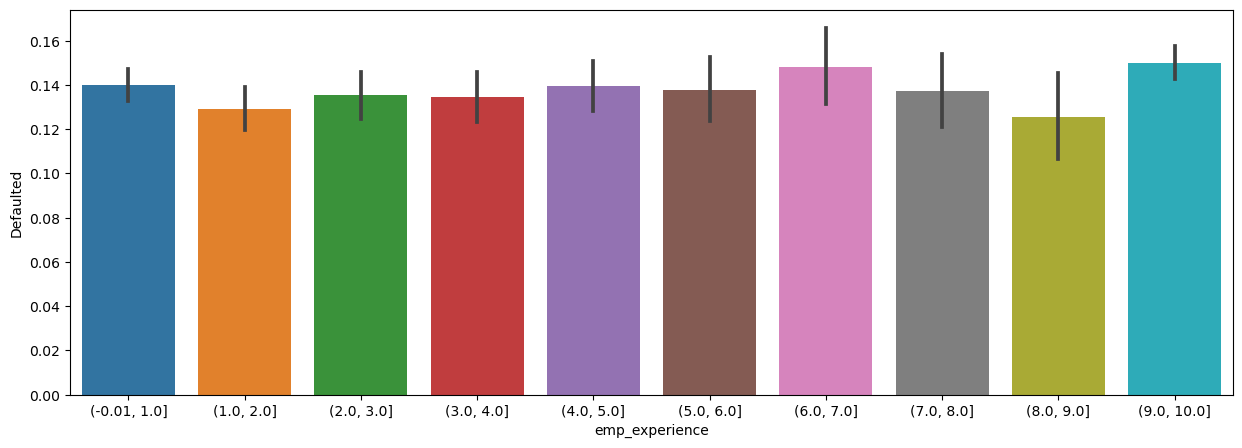

In [59]:
plot_range_with_default(loan_data, 'emp_experience', 10, 15, 5, 'Defaulted')

#### OBSERVATION

* There is no much difference with employee experience

## CONCLUSIONS

* LOAN AMOUNT REQUESTS ARE MAXIMUM IN RANGE OF **0 TO 15K DOLLARS.**
* PEOPLE WHO **OWN HOME** LESS DEFAULTED IN THE LIST.
* A PERSON WITH **HIGHER SALARY IS LIKELY TO BE LESS DEFAULTER.**
* PEOPLE WHO APPLY FOR **SMALL BUSINESS DEFAULT THE MOST.**
* PEOPLE WITH **HIGH INTEREST RATES & LONG TERM ARE LIKELY TO BE DEFAULTED.**
* **A PERSON WHO APPLIES FOR SMALL BUSINESS WITH GRADE E & ABOVE WITH HIGH INTEREST RATE MIGHT DEFAULT**